# Project:  No-show appointments  Data Analysis

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil.




I  will trying to answer about 3 question:


1- What is the most gender received   scholarships ?

2-I would   know range of age  of  patients and the age most  ?

3-Are Are Handicap Patients benefiting from   scholarships ?

In [36]:
# Import necessary packages 

import pandas as pd
import numpy as np
import matplotlib as mb
import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline



#load  noshowappointments.csv

df=pd.read_csv('noshowappointments.csv')


 ## Data Wrangling



# General Properties

In [37]:
# to know how many rows and columns

print ("Rows: ", df.shape[0])
print ("Columns: ", df.shape[1])

# to show 5 line of the dataset
df.head()

Rows:  110527
Columns:  14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## check null values



In [5]:
#I have used this command to check is there any null values
df.isnull().any()


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

# Data Cleaning (drop some columns )

In [6]:
## dropped 4 column 

In [26]:
df.drop(['Neighbourhood','AppointmentDay','AppointmentID','SMS_received','ScheduledDay'], axis=1)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
# Renaming columns to fix typos, inconsistency and spelling mistakes
df.rename(columns={
                   'Handcap':'Handicap', 
                   'Hipertension':'Hypertension'}, 
          inplace=True
         )

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
# removing the outliers
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
df.shape

(110519, 14)

# Exploratory Data Analysis


# Q1: Are Are Handicap Patients benefiting from   scholarships ?

In [9]:
#replace 1 and 0 to yes and no

df['Scholarship'] = df['Scholarship'].replace(1,'yes')
df['Scholarship'] = df['Scholarship'].replace(0,'no')
# how many  Handcaps  get Scholarship 
df.groupby('Scholarship').Handcap.count()




Scholarship
no     99666
yes    10861
Name: Handcap, dtype: int64

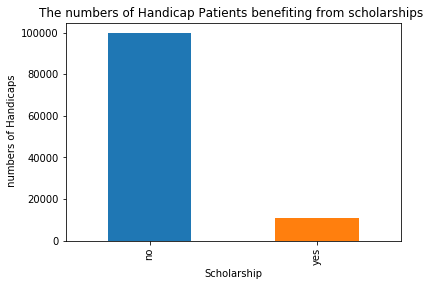

In [10]:
# Create a bar chart  for Scholarships

df.groupby('Scholarship').Handcap.count().plot(kind='bar')
plt.title('The numbers of Handicap Patients benefiting from scholarships ')
plt.xlabel('Scholarship')
plt.ylabel(' numbers of Handicaps');

# Q2:I would   know range of age  of  patients and the age most  ?


In [34]:
# removing the outliers
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
df.shape

(110519, 14)

In [35]:
#creat summary about age
df.describe().Age

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

Text(0.5,1,'Distribution of Age')

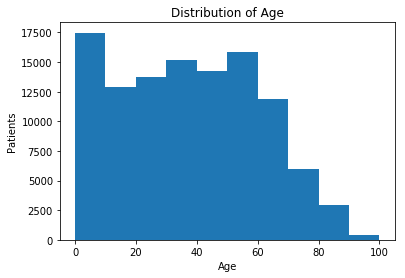

In [30]:
# Distribution of 'Age'
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

# Q3:  What is the most gender received   scholarships?



In [13]:
#how many Scholarships fo Gender
df.groupby('Gender').Scholarship.count()

Gender
F    71840
M    38687
Name: Scholarship, dtype: int64

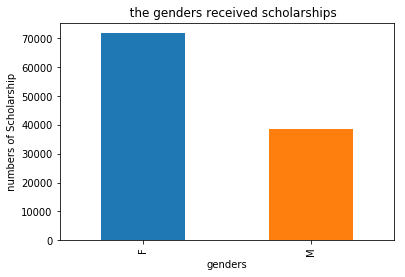

In [14]:

#Create a bar chart  for Gender and Scholarship

df.groupby('Gender').Scholarship.count().plot('bar')

plt.title('   the genders received scholarships')
plt.xlabel('genders')
plt.ylabel(' numbers of Scholarship ');

# Limitations


## Conclusions
in summary, we saw that the  Handicaps not  benefiting from scholarships  but we can conedact many question  suth as what gender has   Handicaps the most to received a scholarships.

in question two the Distribution age of patients were from childern.

in general  ,  there is many of Features in this dataset in order  to investigate it and explore .





In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0